In [1]:
%cd ..

/home/lisa/Documents/TUM/Semester6/thesis/non_continous/code/autobounds-main


In [2]:
from autobounds.causalProblem import causalProblem
from autobounds.DAG import DAG
from copy import deepcopy

import pandas as pd
import networkx as nx
import plotnine as pn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def print_bounds(prog_optim):
    print("==========================")
    (
    print(f"Causal effect lies in the interval [{np.round(prog_optim[0]['dual'], 3)}, "
      f"{np.round(prog_optim[1]['dual'], 3)}]")
    )

# Section 1: Data

## 1.1 Story

## 1.2 EDA 

In [4]:
dat = pd.read_csv("replication_files/data/iv.csv")

# Section 2: Autobounds analysis

## 2.1 Draw the DAG, define the problem, load the data

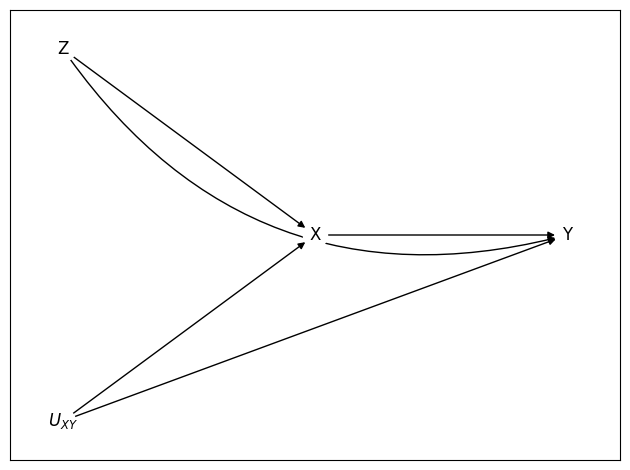

In [5]:
# Mediation DAG
dag = DAG()
dag.from_structure("Z -> X, X -> Y, Z -> Y, Uxy -> X, Uxy -> Y", unob = "Uxy")
dag.plot()

problem = causalProblem(dag)
problem.load_data(dat)

## 2.2 Add assumptions

In [6]:
problem.add_prob_constraints()

cdeproblem0 = deepcopy(problem)
cdeproblem1 = deepcopy(problem)

In [7]:
# Bounds for the NDE
nde_problem = deepcopy(problem)
# E(Y(Z=1, X(Z=0)) - Y(Z=0, X(Z=0))
nde_rh_query = nde_problem.query('Y(Z=0)=1')
# To write, lh_query,
# check values of
#     nde_problem.query('X(Z=0)=0') = X00 and X01
#     nde_problem.query('X(Z=0)=1') = X10 and X11
nde_part1 = nde_problem.query('Y(Z=1,X=1)=1')
nde_part2 = nde_problem.query('Y(Z=1,X=0)=1')
nde_lh_query1 = [ x for x in nde_part2 if 'X00' in x[1][0] or 'X01' in x[1][0] ]
nde_lh_query2 = [ x for x in nde_part1 if 'X10' in x[1][0] or 'X11' in x[1][0] ]
nde_query = Query(nde_lh_query1) + Query(nde_lh_query2) - nde_rh_query
nde_problem.set_estimand(nde_query)
nde_problem.write_program().run_couenne()

# Bounds for the NIE
nie_problem = deepcopy(problem)
# E(Y(Z=0, X(Z=1)) - Y(Z=0, X(Z=0))
nie_rh_query = nde_problem.query('Y(Z=0)=1')
# To write, lh_query,
# check values of
#     nie_problem.query('X(Z=1)=0') = X00 and X10
#     nie_problem.query('X(Z=1)=1') = X01 and X11
nie_part1 = nie_problem.query('Y(Z=0,X=1)=1')
nie_part2 = nie_problem.query('Y(Z=0,X=0)=1')
nie_lh_query1 = [ x for x in nie_part2 if 'X00' in x[1][0] or 'X10' in x[1][0] ]
nie_lh_query2 = [ x for x in nie_part1 if 'X01' in x[1][0] or 'X11' in x[1][0] ]
nie_query = Query(nie_lh_query1) + Query(nie_lh_query2) - nie_rh_query
nie_problem.set_estimand(nie_query)
nie_problem.write_program().run_couenne()

NameError: name 'Query' is not defined

## 2.3 Encode the estimand

In [ ]:
cde_problem0.set_estimand(
        cde_problem0.query('Y(X=1,Z=0)=1') - 
        cde_problem0.query('Y(X=0,Z=0)=1')
)
cde_problem1.set_estimand(
        cde_problem1.query('Y(X=1,Z=1)=1') - 
        cde_problem1.query('Y(X=0,Z=1)=1')
)

## 2.4 Run the program

In [ ]:
# Bounds for CDE, with Z forced to be 0
cde_problem0_optim = cde_problem0.write_program().run_scip()
print_bounds(cde_problem0)
# Bounds for CDE, with Z forced to be 1
cde_problem1_optim = cde_problem1.write_program().run_scip()
print_bounds(cde_problem1)

# Discussion